In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
df = pd.read_csv("http://virtualfif.uaq.mx/diplomado/data/practica_2/EconomiesOfScale.csv")

In [4]:
df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of Units'>

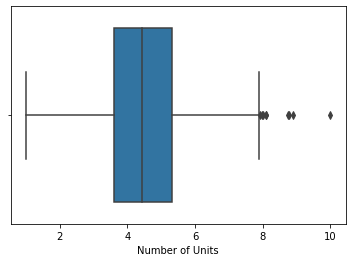

In [6]:
sbn.boxplot(df['Number of Units'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Manufacturing Cost'>

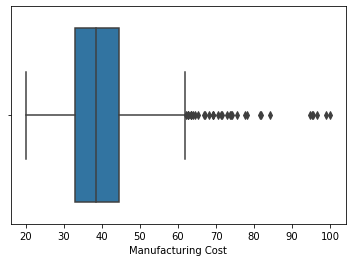

In [7]:
sbn.boxplot(df['Manufacturing Cost'])

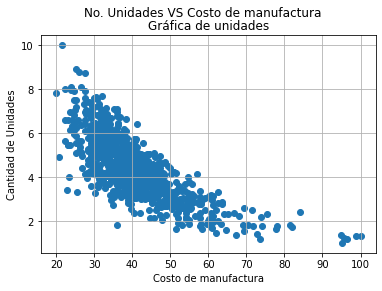

In [11]:
plt.suptitle("No. Unidades VS Costo de manufactura")
plt.title("Gráfica de unidades")
plt.scatter(df['Manufacturing Cost'], df['Number of Units'])
plt.xlabel("Costo de manufactura")
plt.ylabel("Cantidad de Unidades")
plt.grid(2)
plt.show()

In [12]:
Q1 = df['Manufacturing Cost'].quantile(0.25)
Q2 = df['Manufacturing Cost'].quantile(0.50)
Q3 = df['Manufacturing Cost'].quantile(0.75)

In [13]:
Q1
Q2
Q3

44.5318221275

In [14]:
IQR = Q3 - Q1

In [15]:
IQR

11.619786547499999

In [16]:
lower_fence = Q1-(1.5*IQR)
upper_fence = Q3+(1.5*IQR)

In [17]:
lower_fence

15.482355758750003

In [18]:
upper_fence

61.96150194875

In [19]:
df2 = df[~((df['Manufacturing Cost']<lower_fence) | (df['Manufacturing Cost']>upper_fence))]

In [71]:
X = df.iloc[:,:1]
y = df.iloc[:,-1:]

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 36/100, random_state=0)

In [73]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

In [74]:
modelo.fit(X_poly, y_train)

LinearRegression()

In [75]:
modelo.score(X_poly, y_train)

0.6526990354533291

In [76]:
modelo.score(X_poly_test, y_test)

0.6812238606435316

In [77]:
y_pred = modelo.predict(X_poly)

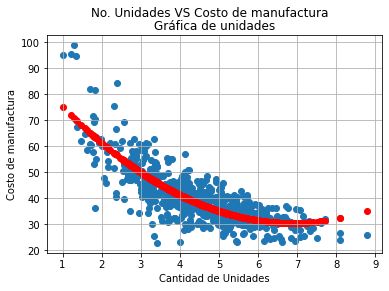

In [78]:
plt.suptitle("No. Unidades VS Costo de manufactura")
plt.title("Gráfica de unidades")
#plt.plot(df['Number of Units'])
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_pred, color="red")
plt.ylabel("Costo de manufactura")
plt.xlabel("Cantidad de Unidades")
plt.grid(1)
plt.show()

In [80]:
y_pred = modelo.predict(X_poly_test)

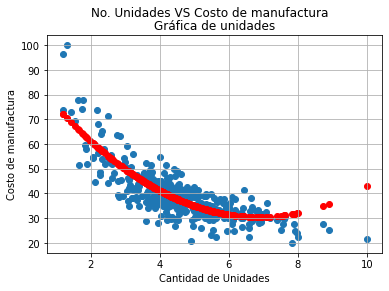

In [81]:
plt.suptitle("No. Unidades VS Costo de manufactura")
plt.title("Gráfica de unidades")
#plt.plot(df['Number of Units'])
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, color="red")
plt.ylabel("Costo de manufactura")
plt.xlabel("Cantidad de Unidades")
plt.grid(1)
plt.show()

In [30]:
#pd. al final no use los outliners